# **Facial Emotion Recognition using CNN**

## **Installing dependencies**

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing Necessary Libraries**

In [54]:
#importing Required libraries

import numpy as np 
#NumPy: A Python library used for working with arrays

import pandas as pd 
#Pandas: Open-Source Python package widely used for data science/data analysis and machine learning tasks

import matplotlib.pyplot as plt 
#Matplotlib: A library for creating static, animated, and interactive visualizations in Python

# A Python library for downloading datasets from Kaggle, Google Drive, and other online sources.
import opendatasets as od

import os
# OS: OS module in Python provides functions for interacting with the operating system. OS comes under Python's standard utility modules

import plotly.express as px

import tensorflow
#TensorFlow: TensorFlow is a free and open-source software library for machine learning

import keras
# Keras is a minimalist Python library for deep learning that can run on top of Theano or TensorFlow. 
# It was developed to make implementing deep learning models as fast and easy as possible for research and development.

from tensorflow.keras.models import Sequential
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

from tensorflow.keras.utils import to_categorical
# Converts a class vector (integers) to binary class matrix.

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')


print('All required libraries are imported')


All required libraries are imported


## **Downloading the Data**

The dataset is available at https://www.kaggle.com/datasets/ashishpatel26/facial-expression-recognitionferchallenge .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [3]:
od.download('https://www.kaggle.com/datasets/ashishpatel26/facial-expression-recognitionferchallenge')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pankajbarai
Your Kaggle Key: ··········


100%|██████████| 96.6M/96.6M [00:00<00:00, 119MB/s]


The dataset is downloaded and extracted to the folder `facial-expression-recognitionferchallenge`.

In [4]:
os.listdir('facial-expression-recognitionferchallenge')

['fer2013', 'Submission.csv']

The file `fer2013.csv` contains the data. Let's load it into a Pandas dataframe.

In [5]:
#loading dataframe using pandas
data = pd.read_csv('/content/facial-expression-recognitionferchallenge/fer2013/fer2013/fer2013.csv')

In [6]:
#checking first five rows of dataset
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Shape of dataset using **`DataFrame.shape()`**

---

Which tells us the number of rows and columns of a given DataFrame.

In [7]:
#dataset shape
data.shape

(35887, 3)

Information about datset using **`DataFrame.info()`**

---
The info() method prints information about the DataFrame.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [8]:
# Check the datasets info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


## **Dealing with Null Values**

* We can use **`DataFrame.isnull()`** to check the null values
* We can use **`DataFrame.isnull().sum()`** to get the sum of all null values
* OR we can created our own function using pandas dataframe to find missing values
* We can also use **`DataFrame.stb.missing()`** to chcek missing values and their percentage.

In [9]:
# data.isnull().sum()

miss = pd.DataFrame({'cols': data.columns,
                     'Missing':[any(data[x].isnull()) for x in data.columns],
                     'Count': [sum(data[x].isnull()) for x in data.columns],
                     'percentage':[sum(data[x].isnull())*100/data.shape[0] for x in data.columns]})
miss

,cols,Missing,Count,percentage
0,emotion,False,0,0.0
1,pixels,False,0,0.0
2,Usage,False,0,0.0


- No missing values

In [10]:
data.Usage.value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [11]:
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [12]:
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [13]:
np.unique(data['emotion'])

array([0, 1, 2, 3, 4, 5, 6])

In [14]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , 
             color = np.unique(data['emotion']) ,
             color_continuous_scale="thermal") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Train Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

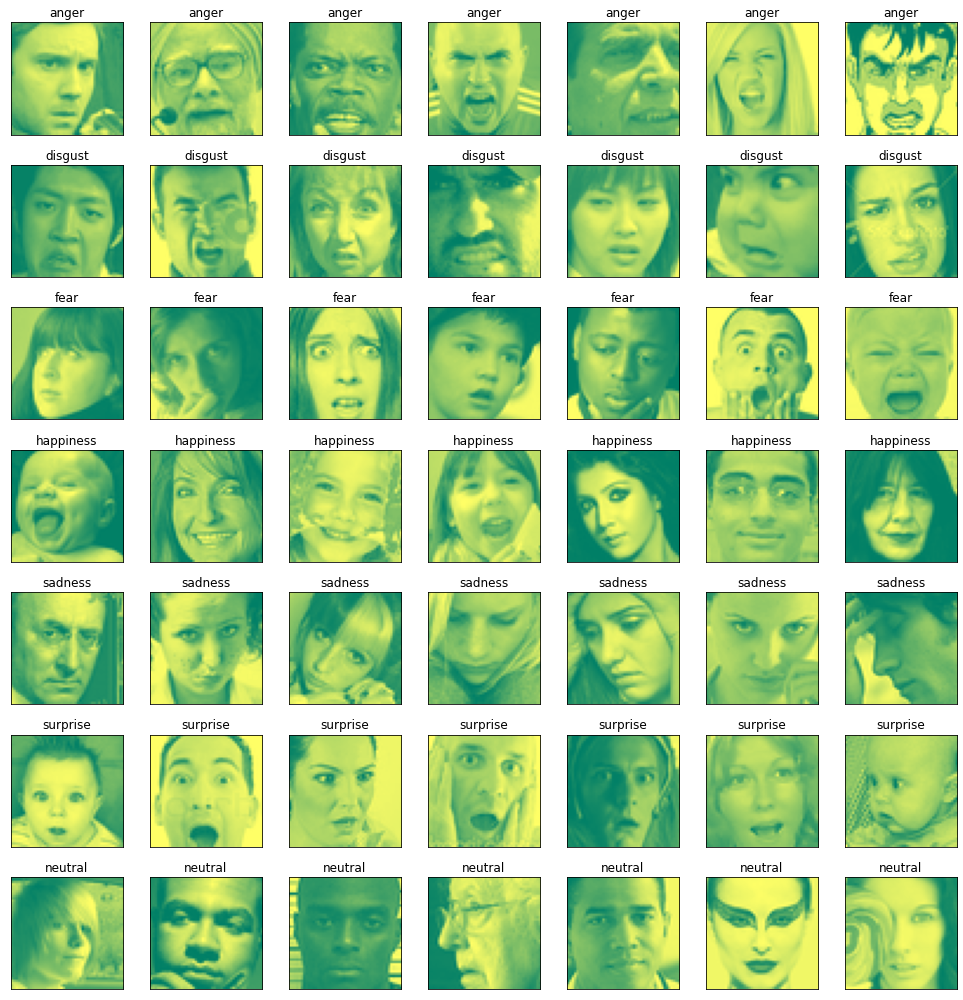

In [15]:
labels = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(data.emotion.unique()):
    for j in range(7):
        px = data[data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='summer')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(labels[label])
        plt.tight_layout()

In [16]:
label_s = to_categorical(data[['emotion']])

In [17]:
label_s.shape

(35887, 7)

In [18]:
data.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [19]:
data.shape

(35887, 3)

In [20]:
t = data['pixels'].astype(str).str.split(' ').tolist()
t = np.uint8(t)
t.shape

(35887, 2304)

In [21]:
pixels = t.reshape(35887 * 2304,1)
pixels.shape

(82683648, 1)

In [22]:
#StandardScaler removes the mean and scales each feature/variable to unit variance. 
# This operation is performed feature-wise in an independent way.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
pixels = scaler.fit_transform(pixels)
pixels.shape

(82683648, 1)

Reshaping the Data (48,48,1)
- (48*48 = 2304)

In [23]:
#Reshaping

pixels = t.reshape((35887,48,48,1))

In [24]:
pixels.shape

(35887, 48, 48, 1)

In [25]:
#splitting the dataset into train, test and validation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(pixels, label_s, test_size = 0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

In [26]:
#chceking shape of each split

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)
(29068, 7)
(3589, 7)
(3230, 7)


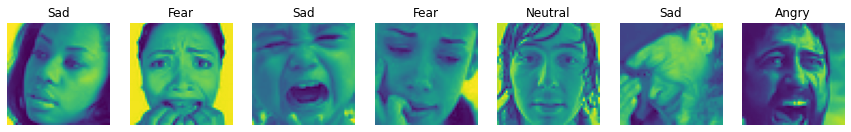

In [27]:
#plotting data from train dataset
plt.figure(figsize = (15,23))
label_dict = {0:'Angry', 1:'Disgust',2:'Fear',3:'Happiness',4:'Sad',5:'Surprise',6:'Neutral'}
i = 1
for i in range(7):
  img = np.squeeze(x_train[i])
  plt.subplot(1,7,i+1)
  plt.imshow(img)
  index = np.argmax(y_train[i])
  plt.title(label_dict[index])
  plt.axis('off')
  i += 1
plt.show()

## **Data Preprocessing**

Steps for preprocessing images:
1. Read the image files
2. Decode the JPEG content to RGB grids of pixels
3. Convert tthe pixels into float point tensors
4. Rescale the pixel values( 0 to 255) to [0, 1]

Fortunatly we don't have to do these seperately , we can use the keras module called `ImageDataGenerator` which takes care of these steps to a great extent so that we get batches of preprocessed tensors 

In [28]:
datagen = ImageDataGenerator(
    rotation_range=40, # it is the value in degrees(0 - 180) to randomly rotate the picture 
    width_shift_range=0.2 , # width_shift and height_shift are translations vertically or horizontally 
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
valgen = ImageDataGenerator(
    rotation_range=40, # it is the value in degrees(0 - 180) to randomly rotate the picture 
    width_shift_range=0.2 , # width_shift and height_shift are translations vertically or horizontally 
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(x_train)
valgen.fit(x_val)

In [29]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64)
val_generator = datagen.flow(x_val,y_val, batch_size= 64)

## **Build the model**

**Conv2D** - 

- **256** - Number of Filters
- **kernel_size** - Shape of the Convolutional Kernel
- **input_shape** - Shape of the Image with 28 by 28 pixels and 1 Color Channel

**MaxPooling2D** - 
- pool_size - Pooling Window of 3 by 3 pixels

**A Larger Stride reduces the Output Dimensions of the Layers**

In [58]:
#Most common type of model is a stack of layers
model=Sequential()

# model.add(Conv2D(64, (3,3), padding = 'same',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3),padding = 'same', activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding = 'same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3),padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3),padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3),padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
# Adds a densely-connected layer with 512 units to the model:
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
#Adding another dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

# Add an output layer with 7 output units (7 different classes):
model.add(Dense(7, activation='softmax'))


#summary representation of model.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 24, 24, 128)     

####**Compile the model using Adam Optimizer with Learning_Rate = 0.005 and Sparse Categorical Crossentropy**


- **`Adam`** - An optimisation algorithm that can be used to adjust network weights iteratively based on training data instead of the traditional stochastic gradient descent method
- **`Sparse Categorical Crossentropy`** - Used in multi-class classification. Compares the **predicted label** and **true label** and calculates the **loss**


In [59]:
# Define the model optimizer, loss function and metrics

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)

# Compiling the model.
model.compile(
    optimizer = opt,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

##**Train the model for 60 Epochs**

- **`Epoch`** is the training samples pass through the learning algorithm simultaneously before weights are updated

- `Early Stopping` is a technique that monitors the performance of the network for every epoch on a held out validation set during the training run and terminates the training based on the Validation Performance

In [60]:
%%time
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 10,verbose = 1, restore_best_weights=True,mode='max') #Here, we are maximizing the val_accuracy

#In this case, the training will terminate only if there is no improvement in the monitor performance measure for 5 epochs in a row
#0.01 means that the Validation_Accuracy has to improve by atleast 0.01 for it to count as an Improvement
epochs = 60

history = model.fit(train_generator,
          epochs= epochs, #If you dont pass epochs, it will train for 1 Epoch
          batch_size = 64,
          callbacks=[early_stopping],
          verbose=2,
          validation_data = val_generator
          )
#model.fit returns a Tensorflow History Object
#It contains a record of the progress of the Network during training
#in terms of the Loss and the Metrics

Epoch 1/60
455/455 - 21s - loss: 1.9308 - accuracy: 0.2231 - val_loss: 1.8083 - val_accuracy: 0.2585 - 21s/epoch - 46ms/step
Epoch 2/60
455/455 - 18s - loss: 1.8192 - accuracy: 0.2386 - val_loss: 1.7847 - val_accuracy: 0.2638 - 18s/epoch - 39ms/step
Epoch 3/60
455/455 - 18s - loss: 1.8007 - accuracy: 0.2478 - val_loss: 1.7891 - val_accuracy: 0.2635 - 18s/epoch - 39ms/step
Epoch 4/60
455/455 - 18s - loss: 1.7902 - accuracy: 0.2533 - val_loss: 1.7661 - val_accuracy: 0.2678 - 18s/epoch - 39ms/step
Epoch 5/60
455/455 - 18s - loss: 1.7844 - accuracy: 0.2565 - val_loss: 1.7514 - val_accuracy: 0.2715 - 18s/epoch - 39ms/step
Epoch 6/60
455/455 - 19s - loss: 1.7709 - accuracy: 0.2655 - val_loss: 1.7495 - val_accuracy: 0.2824 - 19s/epoch - 41ms/step
Epoch 7/60
455/455 - 18s - loss: 1.7605 - accuracy: 0.2732 - val_loss: 1.7332 - val_accuracy: 0.2941 - 18s/epoch - 39ms/step
Epoch 8/60
455/455 - 18s - loss: 1.7422 - accuracy: 0.2877 - val_loss: 1.6835 - val_accuracy: 0.3198 - 18s/epoch - 39ms/step


## **Visualizing results**

`history` attribute contains all information collected during training

In [61]:
def plot(history, epochs):
    # Displaying the curves for loss and accuracy during training
    import matplotlib.pyplot as plt
    # plot epochs vs. accuracy
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(1, len(acc)+1)
    plt.plot(epochs, acc, 'bo', label='training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('training vs validation accuracy')
    plt.legend()
    plt.show()
    # plot epochs vs. loss
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()


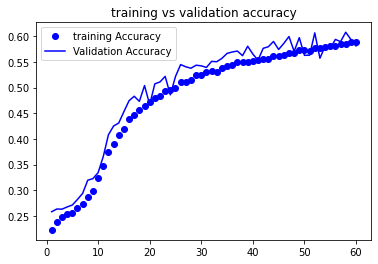

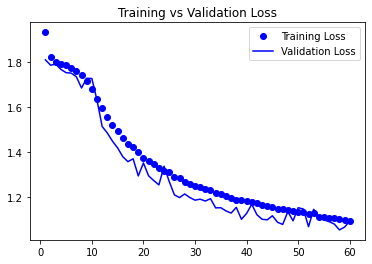

In [62]:
plot(history, epochs)

`evaluate` : Returns the loss value and metrics values for the model in test mode. Computation is done in batches.

In [63]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

113/113 [==============================] - 2s 9ms/step - loss: 1.0786 - accuracy: 0.5982
Test Accuracy: 0.5982167720794678
Test Loss: 1.0786104202270508


`model.get_config()`: returns a dictionary containing the configuration of the model. The model can be reinstantiated from its config.

In [64]:
model.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 48, 48, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'conv2d_22_input'}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_22',
    'trainable': True,
    'batch_input_shape': (None, 48, 48, 1),
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'BatchNormalization',
   'config': {'name': 'batch_normalization_6',
    'trai

## **Predictions**

In [65]:
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis = 1)

113/113 [==============================] - 1s 7ms/step


A `classification report` is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

In [67]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis = 1), y_pred))

              precision    recall  f1-score   support

           0       0.47      0.59      0.52       505
           1       0.82      0.13      0.22        70
           2       0.68      0.15      0.24       539
           3       0.85      0.82      0.84       847
           4       0.49      0.52      0.50       606
           5       0.63      0.83      0.71       413
           6       0.50      0.67      0.57       609

    accuracy                           0.60      3589
   macro avg       0.63      0.53      0.52      3589
weighted avg       0.62      0.60      0.58      3589



> - The model trained with 60 epochs has better results than the model trained with 30 epochs.
- `Accuracy : 60`